In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Train new.csv')
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
data=data.rename(columns={'Reached.on.Time_Y.N':'Reached_on_time'})

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

In [7]:
categorical_data=data.select_dtypes(include=["object"])
numerical_data=data.select_dtypes(include=["int","float"])

<Axes: xlabel='Reached_on_time'>

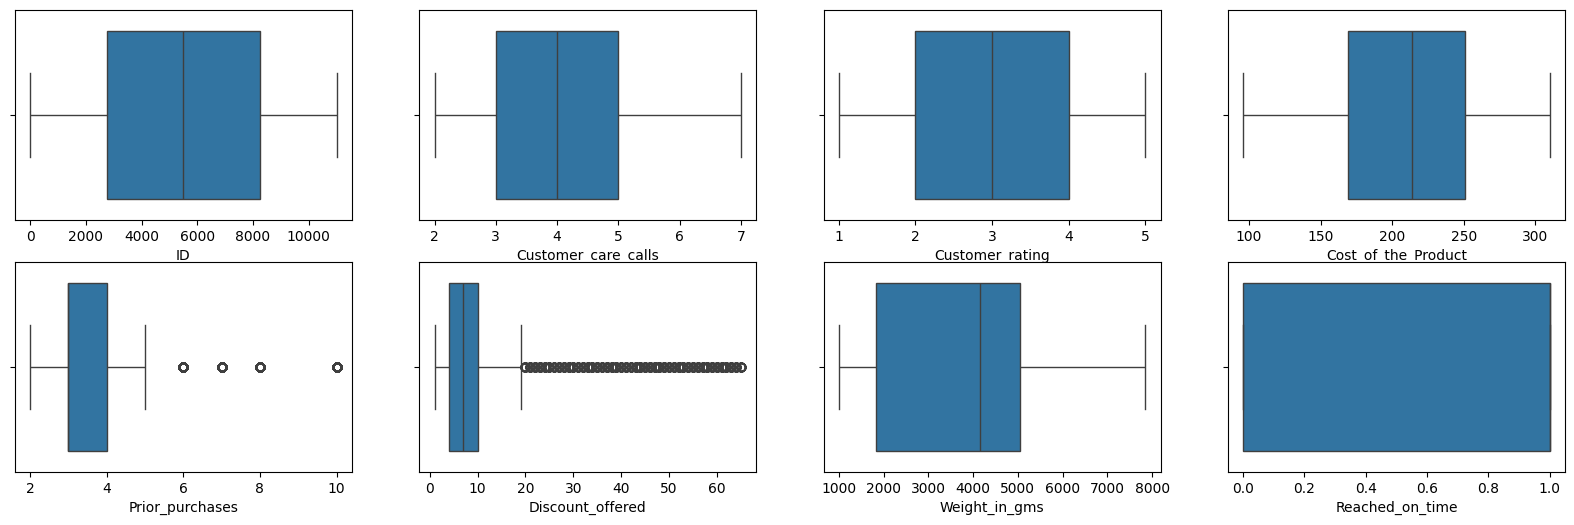

In [8]:
fig, axes=plt.subplots(2,4,figsize=(20,6))
sns.boxplot(data=data,x='ID',ax=axes[0][0])
sns.boxplot(data=data,x='Customer_care_calls',ax=axes[0][1])
sns.boxplot(data=data,x='Customer_rating',ax=axes[0][2])
sns.boxplot(data=data,x='Cost_of_the_Product',ax=axes[0][3])
sns.boxplot(data=data,x='Prior_purchases',ax=axes[1][0])
sns.boxplot(data=data,x='Discount_offered',ax=axes[1][1])
sns.boxplot(data=data,x='Weight_in_gms',ax=axes[1][2])
sns.boxplot(data=data,x='Reached_on_time',ax=axes[1][3])

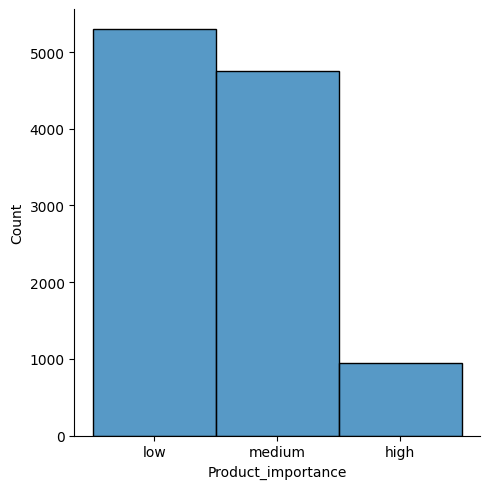

In [9]:
sns.displot(data=data,x='Product_importance',kind='hist')

<Axes: xlabel='Gender', ylabel='count'>

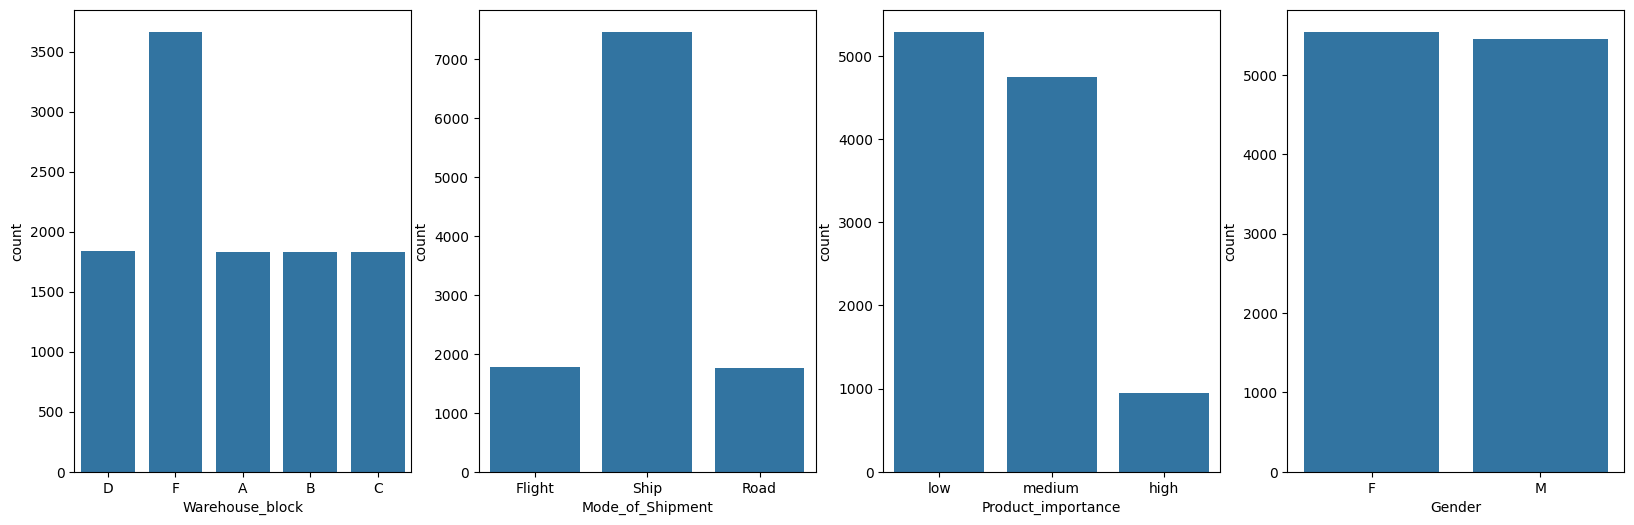

In [10]:
fig, axes =plt.subplots(1,4,figsize=(20,6))
sns.countplot(data=data,x='Warehouse_block',ax=axes[0])
sns.countplot(data=data,x='Mode_of_Shipment',ax=axes[1])
sns.countplot(data=data,x='Product_importance',ax=axes[2])
sns.countplot(data=data,x='Gender',ax=axes[3])

In [11]:
categorical_data.mode()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,F,Ship,low,F


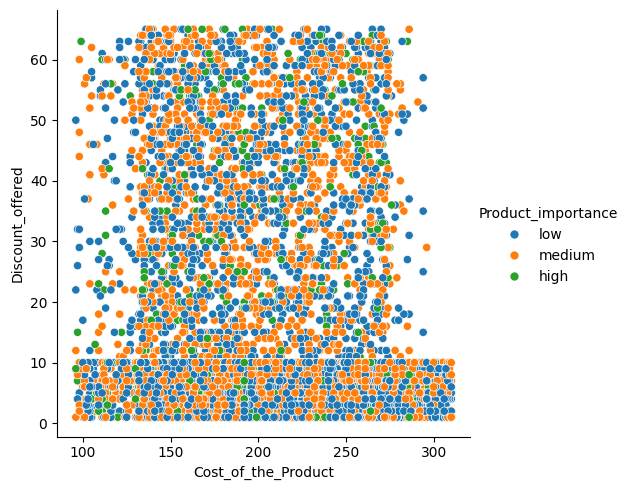

In [12]:
sns.relplot(data=data,x='Cost_of_the_Product',y='Discount_offered',hue='Product_importance',kind="scatter")

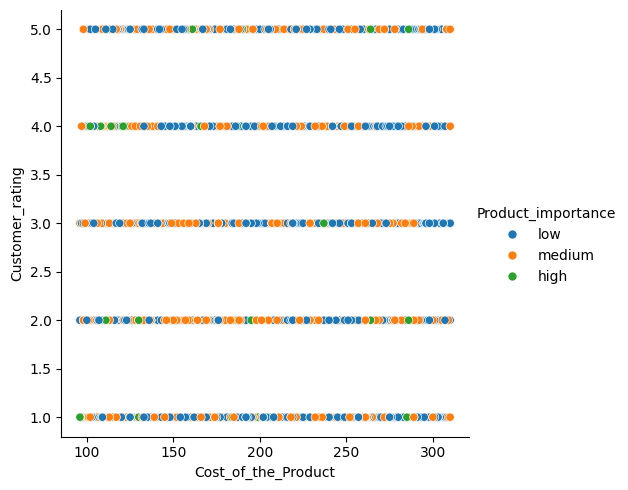

In [13]:
sns.relplot(data=data,x='Cost_of_the_Product',y='Customer_rating',hue='Product_importance',kind="scatter")

<Axes: >

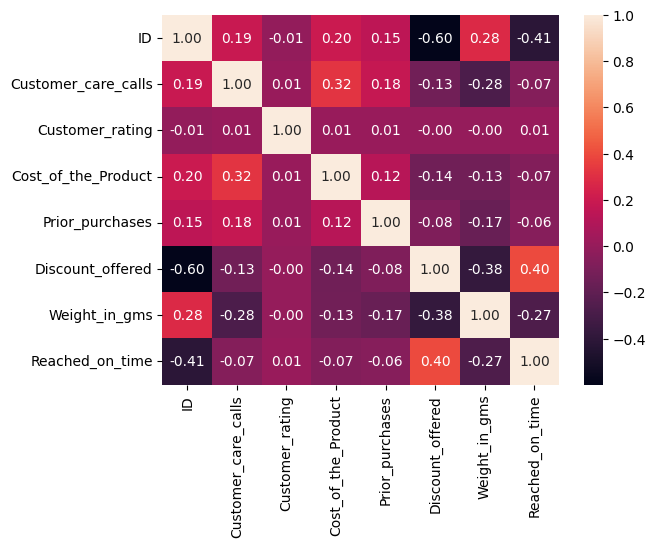

In [14]:
sns.heatmap(numerical_data.corr(), annot=True, fmt='.2f')

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(data['Gender'])
s_gender=pd.Series(le.transform(data['Gender']))
s_gender=s_gender.rename('Gender')
data=data.drop(columns=['Gender'],axis=1)
data=pd.concat([data,s_gender],axis=1)
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_time,Gender
0,1,D,Flight,4,2,177,3,low,44,1233,1,0
1,2,F,Flight,4,5,216,2,low,59,3088,1,1
2,3,A,Flight,2,2,183,4,low,48,3374,1,1
3,4,B,Flight,3,3,176,4,medium,10,1177,1,1
4,5,C,Flight,2,2,184,3,medium,46,2484,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,1,1538,1,0
10995,10996,B,Ship,4,1,232,5,medium,6,1247,0,0
10996,10997,C,Ship,5,4,242,5,low,4,1155,0,0
10997,10998,F,Ship,5,2,223,6,medium,2,1210,0,1
